In [19]:
pip install tensorflow numpy matplotlib scikit-learn seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------ --------------------------------- 2.0/11.6 MB 42.3 MB/s eta 0:00:01
   -------------- ------------------------- 4.3/11.6 MB 45.4 MB/s eta 0:00:01
   ------------------------ --------------- 7.0/11.6 MB 49.7 MB/s eta 0:00:01
   -------------------------------- ------- 9.6/11.6 MB 50.9 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 46.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
   --------------------------------------- 509.2/509.2 kB 31.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
   --------------------------------------- 347.8/347.8 kB 21.1 MB/s eta 0:00:00
Note: y


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Alumno_AI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
pip install python-multipart

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Alumno_AI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalización de los datos
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Redimensionar imágenes para que sean compatibles con CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# División de datos para validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Definir el modelo de red neuronal convolucional
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Guardar el modelo
model.save("digit_recognition_model.h5")

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8565 - loss: 0.4514 - val_accuracy: 0.9838 - val_loss: 0.0618
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9741 - loss: 0.0879 - val_accuracy: 0.9887 - val_loss: 0.0397
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9824 - loss: 0.0592 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9865 - loss: 0.0455 - val_accuracy: 0.9903 - val_loss: 0.0322
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9877 - loss: 0.0381 - val_accuracy: 0.9905 - val_loss: 0.0336
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9902 - val_loss: 0.0363
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9920 - val_loss: 0.0297
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0

Test Accuracy: 0.9925


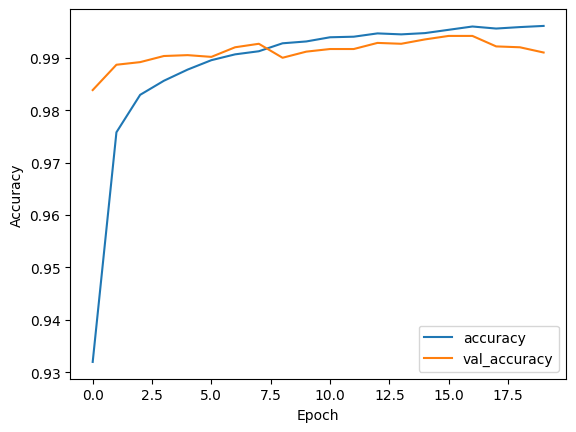

In [23]:
# Visualización de los resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Implementar API con FastAPI para inferencia
from fastapi import FastAPI, File, UploadFile
from PIL import Image
import io

app = FastAPI()

# Cargar el modelo entrenado
model = keras.models.load_model("digit_recognition_model.h5")

def preprocess_image(image):
    image = image.convert("L")  # Convertir a escala de grises
    image = image.resize((28, 28))
    image = np.array(image).astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)  # Añadir batch dimension
    image = np.expand_dims(image, axis=-1)  # Añadir canal
    return image

@app.post("/predict/")
async def predict_digit(file: UploadFile = File(...)):
    image = Image.open(io.BytesIO(await file.read()))
    image = preprocess_image(image)
    prediction = model.predict(image)
    digit = np.argmax(prediction)
    return {"digit": int(digit)}

# Para correr la API: uvicorn script:app --reload

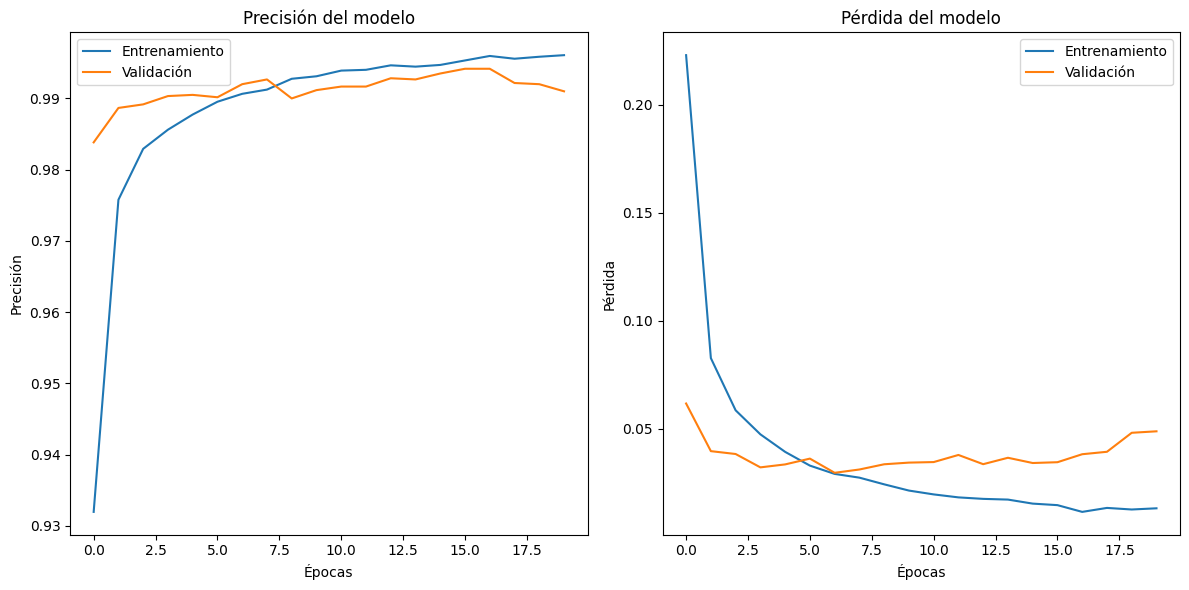

In [24]:
import matplotlib.pyplot as plt

# Gráficas de precisión
plt.figure(figsize=(12, 6))

# Precisión del entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráficas de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


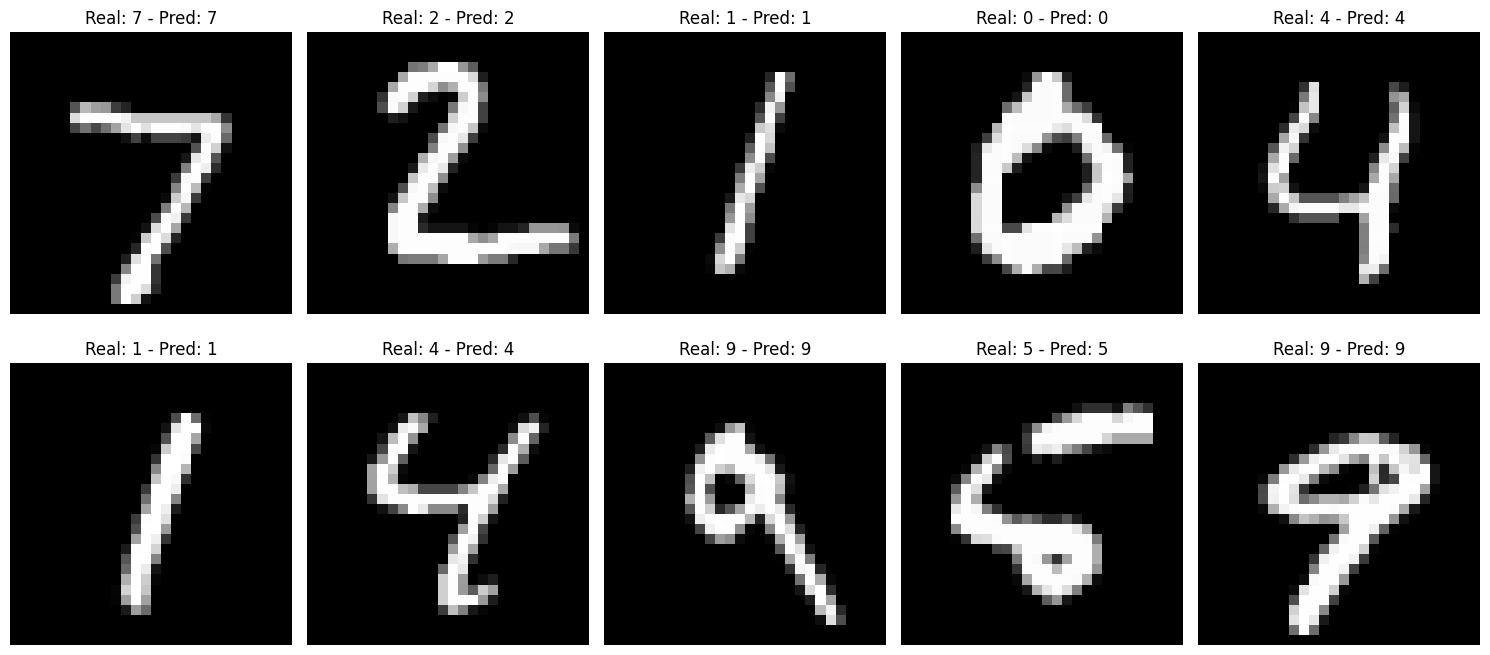

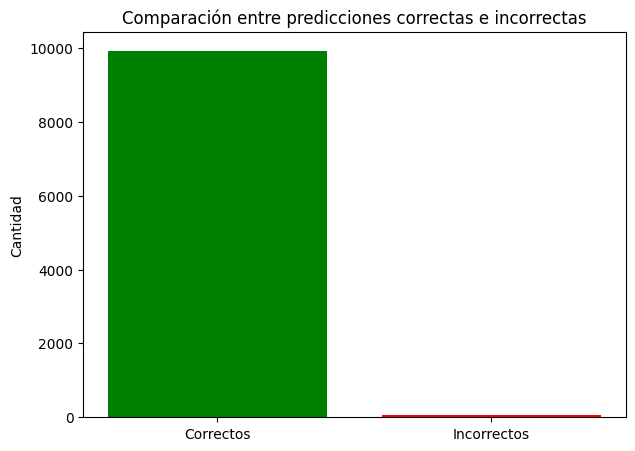

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Hacer predicciones sobre el conjunto de prueba
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Comparar las predicciones con las etiquetas reales
correct_predictions = predicted_labels == true_labels
incorrect_predictions = ~correct_predictions

# Graficar los primeros 10 resultados con predicciones y etiquetas reales
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
axes = axes.ravel()

for i in range(10):
    ax = axes[i]
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Real: {true_labels[i]} - Pred: {predicted_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Graficar la cantidad de aciertos y desaciertos
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(["Correctos", "Incorrectos"], [correct_count, incorrect_count], color=["green", "red"])
ax.set_title("Comparación entre predicciones correctas e incorrectas")
ax.set_ylabel("Cantidad")
plt.show()


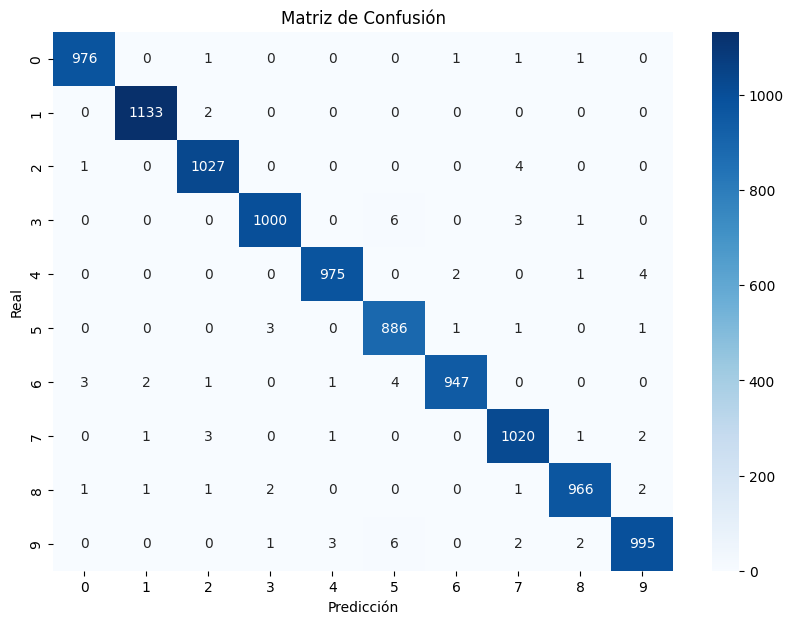

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


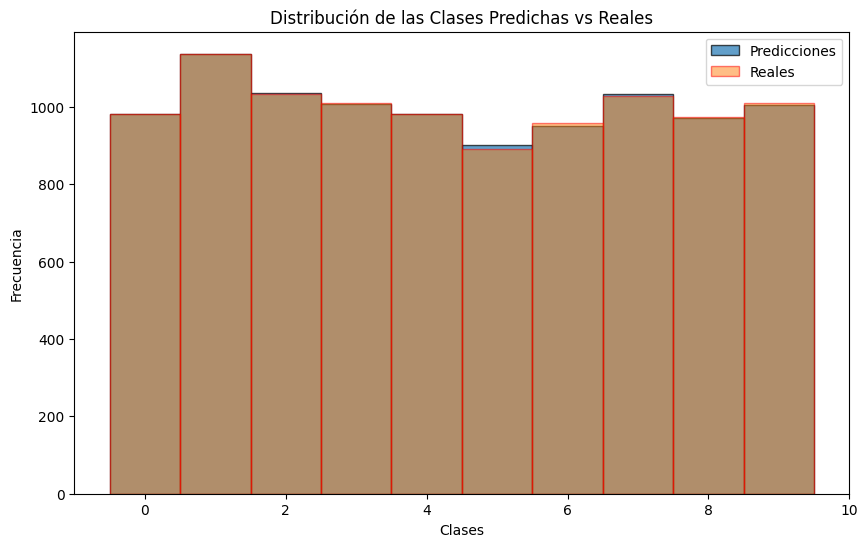

In [27]:
# Distribución de las predicciones
plt.figure(figsize=(10, 6))
plt.hist(predicted_labels, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7, label="Predicciones")
plt.hist(true_labels, bins=np.arange(11) - 0.5, edgecolor='red', alpha=0.5, label="Reales")
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Clases Predichas vs Reales')
plt.legend()
plt.show()


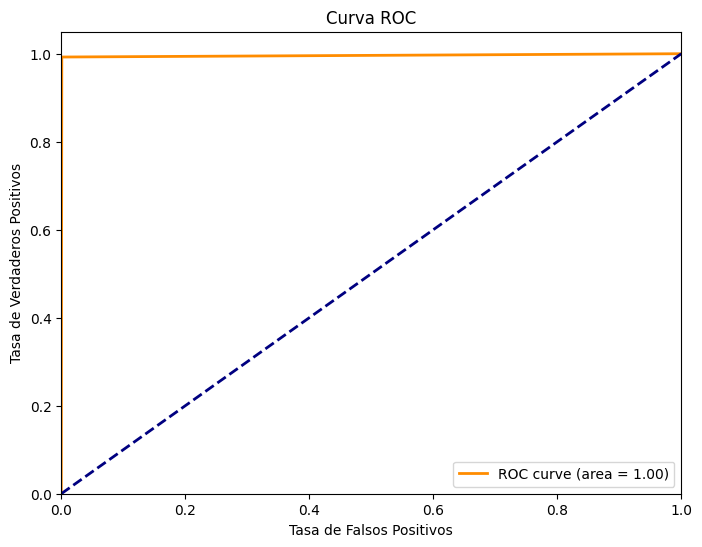

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas verdaderas y predicciones
y_test_bin = label_binarize(true_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_bin = label_binarize(predicted_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Calcular la curva ROC para cada clase
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


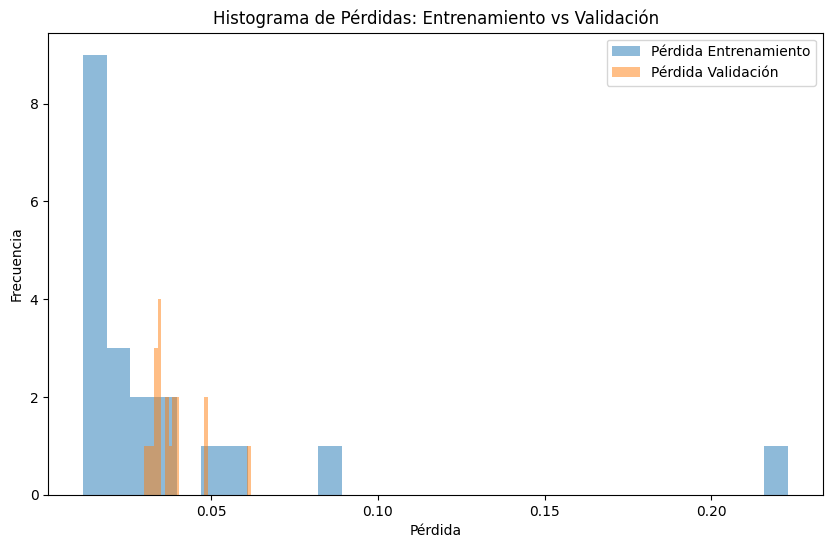

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(history.history['loss'], bins=30, alpha=0.5, label='Pérdida Entrenamiento')
plt.hist(history.history['val_loss'], bins=30, alpha=0.5, label='Pérdida Validación')
plt.title('Histograma de Pérdidas: Entrenamiento vs Validación')
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


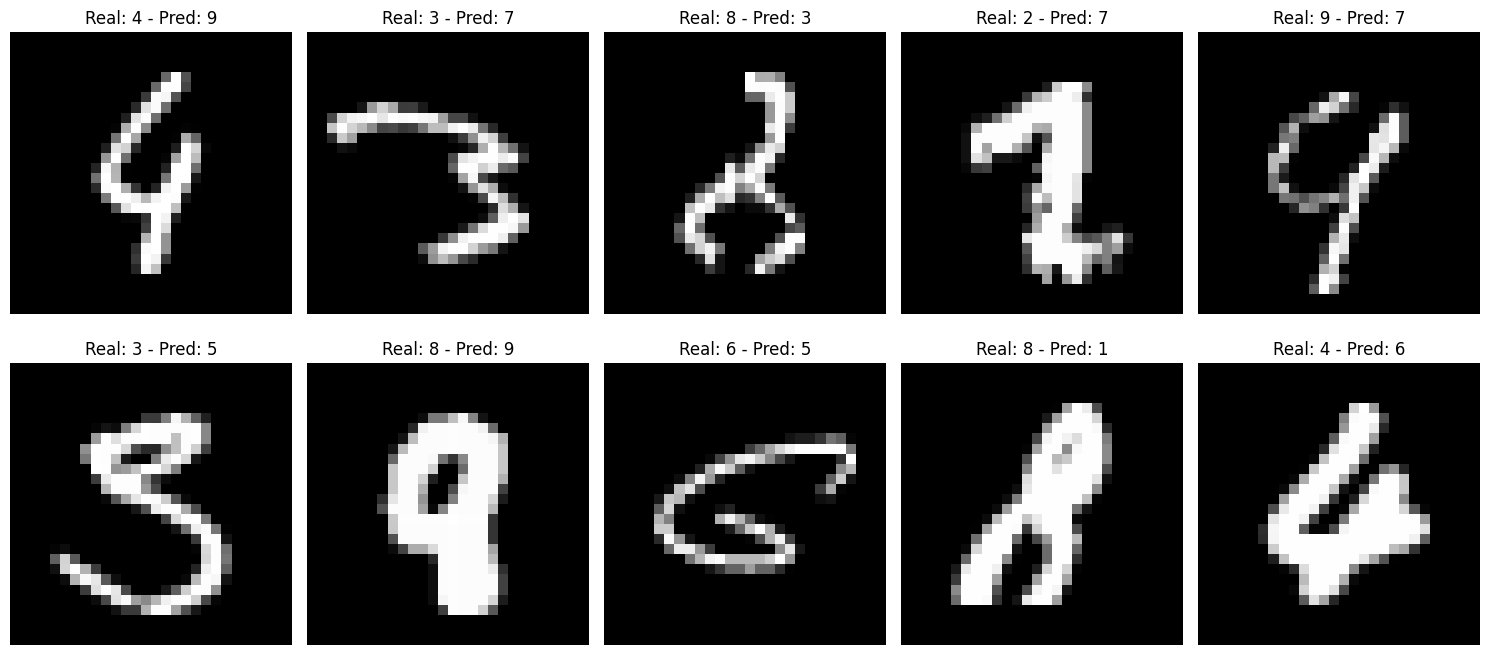

In [30]:
# Mostrar imágenes de errores de predicción
incorrect_indices = np.where(incorrect_predictions)[0]
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
axes = axes.ravel()

for i in range(10):
    index = incorrect_indices[i]
    ax = axes[i]
    ax.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.set_title(f"Real: {true_labels[index]} - Pred: {predicted_labels[index]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
